In [4]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../results/user_data.csv')

In [6]:
df['attractiveness_tier'] = [math.floor(x*100/10) for x in df['attractiveness']]

In [7]:
df.groupby(['gender']).mean()[['likes','matches']]

,likes,matches
gender,,
FEMALE,185.350150,6.473423
MALE,6.981034,3.231859


In [8]:
df.groupby(['gender','attractiveness_tier']).mean()[['likes','matches']]

likes    matches
gender attractiveness_tier                       
FEMALE 0                     12.597892   0.457831
       1                     43.242188   1.504687
       2                     78.969136   2.848765
       3                    115.767045   4.028409
       4                    156.868552   5.475874
       5                    198.729577   6.843662
       6                    241.541420   8.366864
       7                    285.184962  10.048120
       8                    330.199430  11.584046
       9                    377.867692  13.144615
MALE   0                      0.000000   0.000000
       1                      0.000000   0.000000
       2                      0.014914   0.006711
       3                      0.080657   0.037341
       4                      0.399399   0.186186
       5                      1.334845   0.603175
       6                      3.583274   1.669049
       7                      8.827044   4.066824
       8                     18.924300   8.800151
       9                     37.077211  17.147676

In [9]:
df.groupby(['gender']).median()[['likes','matches']]

,likes,matches
gender,,
FEMALE,182.0,6.0
MALE,1.0,0.0


In [10]:
grouped_data = df.groupby(['gender','attractiveness_tier']).mean()[['likes','matches']]

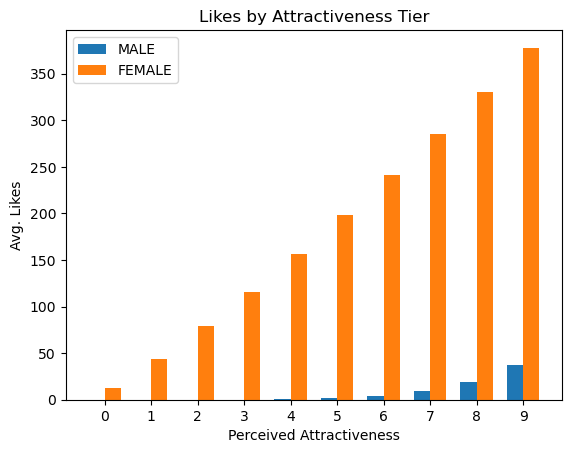

In [11]:

male_data = grouped_data.xs('MALE', level='gender')
female_data = grouped_data.xs('FEMALE', level='gender')

x = male_data.index

bar_width = 0.35
r1 = range(len(x))
r2 = [x + bar_width for x in r1]

plt.bar(r1, male_data['likes'], width=bar_width, label='MALE')
plt.bar(r2, female_data['likes'], width=bar_width, label='FEMALE')

plt.xlabel('Perceived Attractiveness')
plt.ylabel('Avg. Likes')
plt.title('Likes by Attractiveness Tier')

plt.xticks([r + bar_width/2 for r in r1], x)
plt.legend()
plt.show()

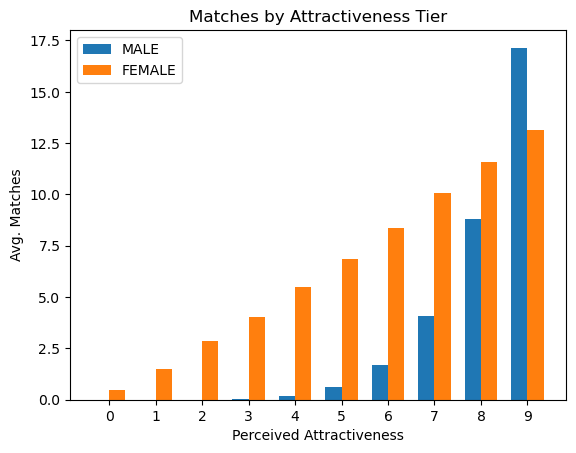

In [12]:

male_data = grouped_data.xs('MALE', level='gender')
female_data = grouped_data.xs('FEMALE', level='gender')

x = male_data.index

bar_width = 0.35
r1 = range(len(x))
r2 = [x + bar_width for x in r1]

plt.bar(r1, male_data['matches'], width=bar_width, label='MALE')
plt.bar(r2, female_data['matches'], width=bar_width, label='FEMALE')

plt.xlabel('Perceived Attractiveness')
plt.ylabel('Avg. Matches')
plt.title('Matches by Attractiveness Tier')

plt.xticks([r + bar_width/2 for r in r1], x)
plt.legend()
plt.show()

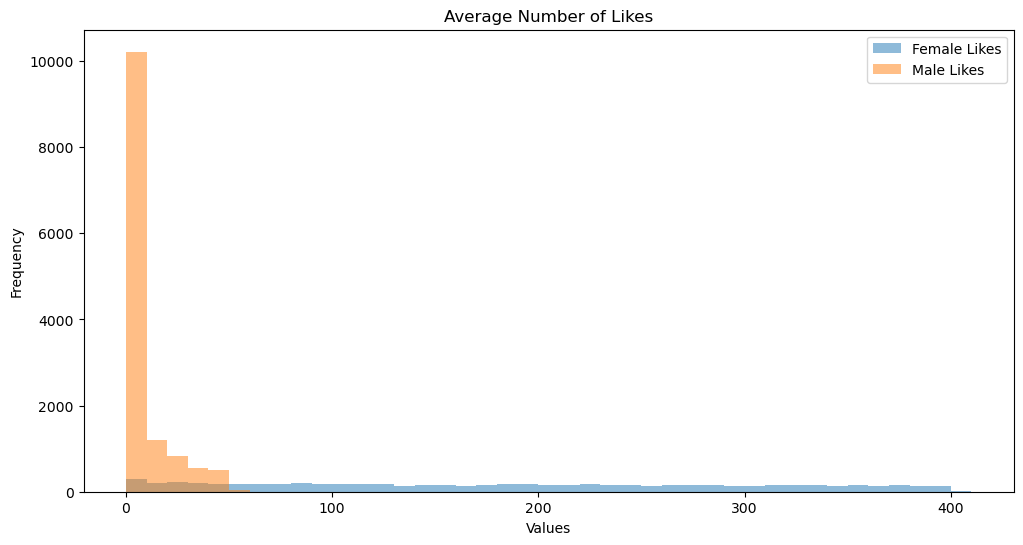

In [13]:
female_likes_total = [x for x in df[df['gender'] == 'FEMALE']['likes']]
male_likes_total = [x for x in df[df['gender'] == 'MALE']['likes']]

def convert_bins_to_size(data_range, X):
    min_val = int(min(data_range))
    max_val = int(max(data_range))
    new_bins = list(range(min_val, max_val + X, X))
    return new_bins

plt.figure(figsize=(12, 6))
data_range = range(int(min(male_likes_total)), int(max(female_likes_total)) + 2)
new_bins = convert_bins_to_size(data_range, 10)
plt.hist(female_likes_total, bins=new_bins, alpha=0.5, label='Female Likes')
plt.hist(male_likes_total, bins=new_bins, alpha=0.5, label='Male Likes')
plt.title("Average Number of Likes")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

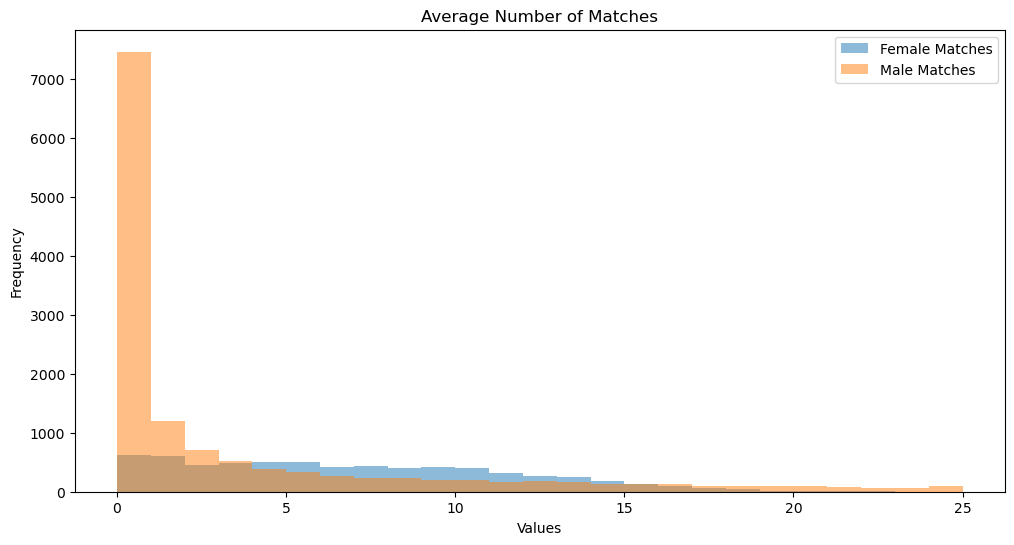

In [16]:
female_matches_total = [x for x in df[df['gender'] == 'FEMALE']['matches']]
male_matches_total = [x for x in df[df['gender'] == 'MALE']['matches']]


plt.figure(figsize=(12, 6))
data_range = range(int(min(male_matches_total)), int(max(female_matches_total)) + 2)
new_bins = convert_bins_to_size(data_range, 1)
plt.hist(female_matches_total, bins=new_bins, alpha=0.5, label='Female Matches')
plt.hist(male_matches_total, bins=new_bins, alpha=0.5, label='Male Matches')
plt.title("Average Number of Matches")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()